# **Práctica RL Mountain Car**
*Jose Peiró Cardona*

# **Introducción**

La rueda ha sido uno de los inventos más importantes y revolucionarios en la historia de la humanidad. Desde la antigüedad, ha permitido la creación de vehículos, facilitado el transporte de bienes y personas, y transformado la manera en que interactuamos con nuestro entorno. En la era moderna, los coches y carros representan el pináculo de esta evolución, utilizando la tecnología para moverse de manera eficiente y rápida. Pero, ¿qué pasa cuando un carro se enfrenta a un desafío aparentemente simple pero engañosamente complicado, como el de superar una colina en un valle? Aquí es donde entra en juego el Aprendizaje por Refuerzo (Reinforcement Learning, RL).

El Aprendizaje por Refuerzo es una rama del aprendizaje automático inspirada en la forma en que los seres humanos y los animales aprenden a través de la interacción con su entorno. Un agente aprende a tomar decisiones a través de la prueba y error, recibiendo recompensas o castigos en función de sus acciones. Este proceso de aprendizaje permite al agente desarrollar una política óptima para alcanzar sus objetivos de manera eficiente.

# **El Desafío del "MountainCar-v0"**

En el entorno "MountainCar-v0", nos encontramos con un carro que debe superar una colina empinada. Sin embargo, el carro no tiene suficiente potencia para alcanzar la cima directamente desde una posición de reposo. La solución no es intuitiva: el carro debe retroceder primero para ganar impulso y luego avanzar con la suficiente velocidad para superar la colina. Este escenario simula la necesidad de estrategias complejas y contrarias a la intuición para resolver problemas del mundo real.

**Componentes del Entorno**

Estados: El estado del entorno está definido por la posición y la velocidad del carro. Estas dos variables son continuas y describen completamente el estado del sistema en cualquier momento.

Acciones: El agente tiene tres acciones discretas a su disposición:

Acelerar hacia la izquierda.

*   Acelerar hacia la izquierda.
*   Acelerar hacia la derecha.
*   No acelerar.


Recompensas: El agente recibe una recompensa de -1 por cada paso hasta que el carro alcance la cima de la colina derecha (posición >= 0.5). El objetivo es minimizar el número de pasos necesarios para alcanzar la cima, maximizando así la recompensa acumulada (menos negativa).


**Estrategias de Aprendizaje: DQN**

Para abordar este desafío, utilizaremos dos algoritmos avanzados de RL:

Deep Q-Networks (DQN): Este algoritmo utiliza redes neuronales profundas para aproximar la función Q, que estima el valor esperado de las acciones en cada estado. DQN es conocido por su capacidad de manejar espacios de estado continuos y resolver problemas complejos de RL.

**Librería gym**

La librería gym es una herramienta desarrollada por OpenAI para proporcionar una interfaz estándar para una amplia variedad de entornos de aprendizaje por refuerzo. Facilita el desarrollo, evaluación y comparación de algoritmos de aprendizaje por refuerzo al ofrecer una colección de entornos de prueba consistentes y reproducibles. Uno de estos entornos es MountainCar-v0, que es particularmente útil para estudiar problemas de control continuo.

In [1]:
# Instalación de bibliotecas necesarias
!pip install stable-baselines3[extra]
!pip install gymnasium
!pip install pyvirtualdisplay
!apt-get install -y xvfb x11-utils
!apt-get install -y ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

In [2]:
# Importar y configurar un display virtual
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# Importar las bibliotecas necesarias
import gymnasium as gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import numpy as np
from gymnasium.wrappers import RecordVideo
import os
from IPython.display import Video, display as ipy_display

La razón principal detrás de la discretización es que muchos algoritmos clásicos de RL funcionan mejor cuando el espacio de estados es discreto en lugar de continuo. En Mountain Car, los estados están definidos por la posición y la velocidad del coche, y estas variables pueden tener un rango continuo de valores. Al discretizar estos valores en bins o celdas, convierto un problema continuo en uno discreto, lo cual hace más manejable la tarea de aprendizaje para mí.

Además, al reducir la complejidad del espacio de estados, puedo aplicar métodos de aprendizaje por tabla como Q-learning de manera más efectiva. Estos métodos requieren que yo mantenga un valor para cada combinación de estado y acción posibles, y la discretización me permite hacer esto de manera más eficiente y precisa.

También, la discretización me ayuda a controlar mejor la exploración del entorno. Al tener estados discretos, puedo diseñar estrategias para explorar de manera más sistemática cada región del espacio de estados, lo cual es crucial para aprender una política de acción óptima y lograr una mejor convergencia en mi entrenamiento.

In [5]:
# Función para discretizar los valores del estado
def discretizar_estado(estado):
    pos_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num_bins - 1)
    vel_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num_bins - 1)
    pos_idx = np.digitize(estado[0], pos_bins)
    vel_idx = np.digitize(estado[1], vel_bins)
    return (pos_idx, vel_idx)



# **1º Entrenamiento**

In [3]:
# Crear el entorno de Mountain Car y configurar la grabación de videos
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda e: e % 100 == 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La configuración inicial de la tabla Q y los parámetros de entrenamiento son pasos cruciales en el proceso de Q-learning.

La tabla Q almacena el conocimiento del agente sobre el entorno, y su almacenamiento periódico asegura que este conocimiento no se pierda y pueda ser evaluado y reutilizado en el futuro.

In [6]:
# Configuración inicial de la tabla Q y parámetros de entrenamiento
num_bins = 20 #número de intervalos en los que dividimos cada dimensión del espacio de estado
num_actions = env.action_space.n
q_table = np.random.uniform(low=-1, high=1, size=(num_bins, num_bins, num_actions))

In [7]:
# Parámetros para el entrenamiento
total_episodes = 1000
learning_rate = 0.1
discount_rate = 0.99
epsilon = 0.9
min_epsilon = 0.01
epsilon_decay = 0.995


# Lista para almacenar las recompensas totales por episodio
recompensas = []

# Función para guardar la tabla Q
def guardar_tabla_q(nombre_archivo):
    np.save(nombre_archivo, q_table)

# Bucle de entrenamiento
for episodio in range(total_episodes):
    estado_discreto = discretizar_estado(env.reset()[0])
    hecho = False
    recompensa_total = 0

    while not hecho:
        if np.random.random() > epsilon:
            accion = np.argmax(q_table[estado_discreto])
        else:
            accion = env.action_space.sample()

        nuevo_estado, recompensa, hecho, truncado, _ = env.step(accion)
        nuevo_estado_discreto = discretizar_estado(nuevo_estado)

        valor_futuro_q = np.max(q_table[nuevo_estado_discreto])
        valor_q_actual = q_table[estado_discreto + (accion,)]
        nuevo_valor_q = (1 - learning_rate) * valor_q_actual + learning_rate * (recompensa + discount_rate * valor_futuro_q)
        q_table[estado_discreto + (accion,)] = nuevo_valor_q

        estado_discreto = nuevo_estado_discreto
        recompensa_total += recompensa

    recompensas.append(recompensa_total)

    # Disminuir epsilon para menos exploración en futuros episodios
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Guardar la tabla Q cada 100 episodios
    if (episodio + 1) % 100 == 0:
        guardar_tabla_q(f"q_table_{episodio + 1}.npy")
        print(f"Episodio {episodio + 1} - Recompensa promedio: {np.mean(recompensas[-100:])}")

env.close()

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Episodio 100 - Recompensa promedio: -2173.25
Moviepy - Building video /content/videos/rl-video-episode-100.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-100.mp4
Episodio 200 - Recompensa promedio: -392.64
Moviepy - Building video /content/videos/rl-video-episode-200.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-200.mp4
Episodio 300 - Recompensa promedio: -349.03
Moviepy - Building video /content/videos/rl-video-episode-300.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-300.mp4
Episodio 400 - Recompensa promedio: -253.8
Moviepy - Building video /content/videos/rl-video-episode-400.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-400.mp4
Episodio 500 - Recompensa promedio: -355.33
Moviepy - Building video /content/videos/rl-video-episode-500.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-500.mp4
Episodio 600 - Recompensa promedio: -282.56
Moviepy - Building video /content/videos/rl-video-episode-600.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-600.mp4
Episodio 700 - Recompensa promedio: -221.58
Moviepy - Building video /content/videos/rl-video-episode-700.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-700.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-700.mp4
Episodio 800 - Recompensa promedio: -202.85
Moviepy - Building video /content/videos/rl-video-episode-800.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-800.mp4
Episodio 900 - Recompensa promedio: -189.12
Moviepy - Building video /content/videos/rl-video-episode-900.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-900.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-900.mp4
Episodio 1000 - Recompensa promedio: -197.14
Moviepy - Building video /content/videos/rl-video-episode-1000.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


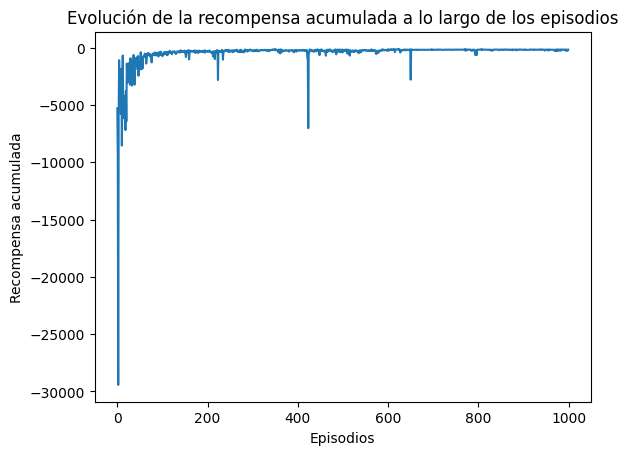

In [8]:
# Característica extra: Gráfico de la evolución de la recompensa acumulada
plt.plot(recompensas)
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('Evolución de la recompensa acumulada a lo largo de los episodios')
plt.show()

In [9]:
# Crear un archivo de texto con la lista de archivos de video
!for f in /content/videos/*.mp4; do echo "file '$f'" >> mylist.txt; done

# Unir todos los archivos de video en un solo archivo
!ffmpeg -f concat -safe 0 -i mylist.txt -c copy output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [10]:

# Verificar la existencia de los videos generados
video_files = [f for f in os.listdir("./videos") if f.endswith(".mp4")]
print("Videos generados:")
for video in video_files:
    print(video)

Videos generados:
rl-video-episode-500.mp4
rl-video-episode-0.mp4
rl-video-episode-800.mp4
rl-video-episode-1000.mp4
rl-video-episode-900.mp4
rl-video-episode-400.mp4
rl-video-episode-100.mp4
rl-video-episode-200.mp4
rl-video-episode-300.mp4
rl-video-episode-600.mp4
rl-video-episode-700.mp4


In [11]:
# Mostrar el video generado
ipy_display(Video("output.mp4", embed=True))

**Resultados**

El gráfico de la evolución de la recompensa acumulada durante el primer entrenamiento y el video revelan varios aspectos importantes sobre el rendimiento del agente:


**1.   Mejora Progresiva:**

Al inicio del entrenamiento, la recompensa acumulada es extremadamente negativa, lo que indica que el agente tiene un desempeño inicial muy bajo. Sin embargo, a medida que avanza el entrenamiento, se observa una mejora significativa en las recompensas, acercándose gradualmente a cero. Esto demuestra que el agente está aprendiendo a optimizar su comportamiento y mejorar su desempeño en la tarea.


**2.   Variabilidad Inicial:**

Durante los primeros episodios, hay una alta variabilidad en las recompensas acumuladas. Esta variabilidad disminuye a medida que el agente adquiere más experiencia y reduce su exploración aleatoria. Esto es indicativo del proceso de aprendizaje en el que el agente está probando diferentes acciones para encontrar la mejor estrategia.


**3.   Caídas Bruscas:**

Se observan algunas caídas bruscas en las recompensas acumuladas alrededor de los episodios 100, 400 y 700. Estas caídas pueden ser el resultado de episodios en los que el agente realiza exploraciones más agresivas o se enfrenta a situaciones particularmente difíciles en el entorno. Estas caídas son normales y forman parte del proceso de ajuste y optimización de la política del agente.


**4.   Convergencia:**

Después de aproximadamente 200 episodios, la recompensa acumulada se estabiliza, lo que sugiere que el agente ha encontrado una política eficaz para superar la colina en el entorno "MountainCar-v0". Esta estabilidad indica que el agente ha aprendido una estrategia consistente y eficiente para maximizar su recompensa acumulada.


En resumen, el agente muestra un claro proceso de aprendizaje y mejora continua a lo largo del entrenamiento, con una tendencia general hacia la optimización de su desempeño. Las variaciones y caídas en la recompensa son normales en el proceso de aprendizaje por refuerzo y reflejan el proceso de exploración y ajuste del agente.

# **2º Entrenamiento: Cambio de hiperparametros**


Para mejorar la velocidad de entrenamiento del modelo Q-learning basado en la discretización del espacio de estados en MountainCar, puedes ajustar varios hiperparámetros clave. Aquí hay algunas sugerencias y un código revisado para hacer el entrenamiento más eficiente:



*   Reducir el número de episodios (total_episodes): Menos episodios reducen el tiempo total de entrenamiento.
*   Aumentar la tasa de aprendizaje (learning_rate): Una tasa de aprendizaje más alta puede acelerar el ajuste de la tabla Q.
*   Aumentar el factor de descuento (discount_rate): Un factor de descuento más alto fomenta el aprendizaje a largo plazo, aunque puede requerir más tiempo para la convergencia.
*   Ajustar el epsilon y su decaimiento (epsilon_decay): Aumentar el epsilon_decay para reducir la exploración más rápidamente y favorecer la explotación.



In [12]:
 # Crear el entorno de Mountain Car y configurar la grabación de videos
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda e: e % 100 == 0)

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [13]:
# Parámetros para el entrenamiento
total_episodes = 500  # Reducido de 1000 a 500
learning_rate = 0.2  # Aumentado de 0.1 a 0.2
discount_rate = 0.99
epsilon = 0.9
min_epsilon = 0.01
epsilon_decay = 0.99  # Aumentado de 0.995 a 0.99

# Lista para almacenar las recompensas totales por episodio
recompensas2 = []

# Bucle de entrenamiento
for episodio in range(total_episodes):
    estado_discreto = discretizar_estado(env.reset()[0])
    hecho = False
    recompensa_total = 0

    while not hecho:
        if np.random.random() > epsilon:
            accion = np.argmax(q_table[estado_discreto])
        else:
            accion = env.action_space.sample()

        nuevo_estado, recompensa, hecho, truncado, _ = env.step(accion)
        nuevo_estado_discreto = discretizar_estado(nuevo_estado)

        valor_futuro_q = np.max(q_table[nuevo_estado_discreto])
        valor_q_actual = q_table[estado_discreto + (accion,)]
        nuevo_valor_q = (1 - learning_rate) * valor_q_actual + learning_rate * (recompensa + discount_rate * valor_futuro_q)
        q_table[estado_discreto + (accion,)] = nuevo_valor_q

        estado_discreto = nuevo_estado_discreto
        recompensa_total += recompensa

    recompensas2.append(recompensa_total)

    # Disminuir epsilon para menos exploración en futuros episodios
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Guardar la tabla Q cada 100 episodios
    if (episodio + 1) % 100 == 0:
        guardar_tabla_q(f"q_table_{episodio + 1}.npy")
        print(f"Episodio {episodio + 1} - Recompensa promedio: {np.mean(recompensas2[-100:])}")

env.close()

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Episodio 100 - Recompensa promedio: -874.73
Moviepy - Building video /content/videos/rl-video-episode-100.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-100.mp4
Episodio 200 - Recompensa promedio: -296.61
Moviepy - Building video /content/videos/rl-video-episode-200.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-200.mp4
Episodio 300 - Recompensa promedio: -236.69
Moviepy - Building video /content/videos/rl-video-episode-300.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-300.mp4
Episodio 400 - Recompensa promedio: -309.69
Moviepy - Building video /content/videos/rl-video-episode-400.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-400.mp4
Episodio 500 - Recompensa promedio: -197.14
Moviepy - Building video /content/videos/rl-video-episode-500.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-500.mp4


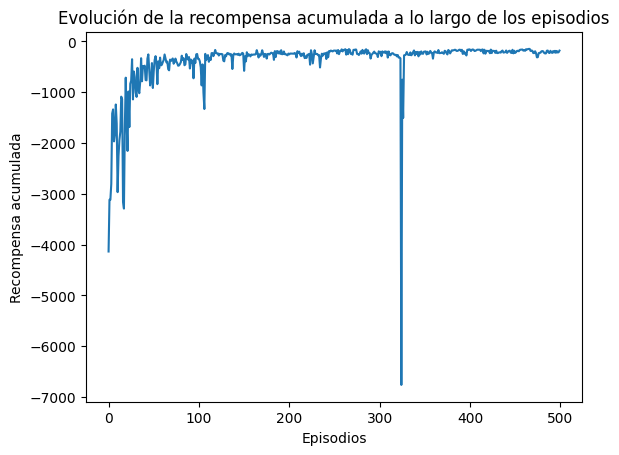

In [14]:
# Característica extra: Gráfico de la evolución de la recompensa acumulada
plt.plot(recompensas2)
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('Evolución de la recompensa acumulada a lo largo de los episodios')
plt.show()

In [15]:
# Crear un archivo de texto con la lista de archivos de video
!for f in /content/videos/*.mp4; do echo "file '$f'" >> mylist.txt; done

# Unir todos los archivos de video en un solo archivo
!ffmpeg -f concat -safe 0 -i mylist.txt -c copy output2.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [16]:
# Verificar la existencia de los videos generados
video_files = [f for f in os.listdir("./videos") if f.endswith(".mp4")]
print("Videos generados:")
for video in video_files:
    print(video)

Videos generados:
rl-video-episode-500.mp4
rl-video-episode-0.mp4
rl-video-episode-800.mp4
rl-video-episode-1000.mp4
rl-video-episode-900.mp4
rl-video-episode-400.mp4
rl-video-episode-100.mp4
rl-video-episode-200.mp4
rl-video-episode-300.mp4
rl-video-episode-600.mp4
rl-video-episode-700.mp4


In [17]:
# Mostrar el video generado
ipy_display(Video("output2.mp4", embed=True))

**Resultados**

El gráfico de la evolución de la recompensa acumulada durante el segundo entrenamiento, con los hiperparámetros ajustados, presenta varias observaciones notables:

**1. Mejora Rápida Inicial:**

Similar al primer entrenamiento, hay una mejora rápida en la recompensa acumulada durante los primeros episodios. Esto indica que el agente es capaz de adaptarse y aprender rápidamente al principio del entrenamiento, aprovechando la tasa de aprendizaje más alta.

**2. Estabilidad a Largo Plazo:**

Después de aproximadamente 100 episodios, la recompensa acumulada se estabiliza, manteniéndose en un rango menos negativo comparado con el entrenamiento anterior. Esto sugiere que el agente ha encontrado una política efectiva más rápidamente debido a los ajustes en los hiperparámetros.

**3. Caídas Bruscas:**

Aunque hay algunas caídas bruscas en la recompensa acumulada, especialmente notable alrededor del episodio 300, estas caídas son menos frecuentes y menos severas en comparación con el primer entrenamiento. Esto puede ser un reflejo de la mejor exploración y explotación balanceada debido al ajuste en el decaimiento de epsilon.

**4. Menor Variabilidad:**

La variabilidad en la recompensa acumulada es menor en este gráfico en comparación con el primer entrenamiento, indicando que el agente está tomando decisiones más consistentes y efectivas a lo largo del tiempo.

**5. Convergencia más Rápida:**

El agente converge hacia una política óptima en menos episodios comparado con el primer entrenamiento, lo cual es un resultado directo de la reducción del número total de episodios y el aumento en la tasa de aprendizaje.


En definitiva, los resultados del segundo entrenamiento muestran una mejora en la eficiencia y efectividad del agente debido a los ajustes en los hiperparámetros. El agente no solo aprende más rápido, sino que también muestra una mayor estabilidad en su desempeño a lo largo del tiempo, reflejando un aprendizaje más robusto y consistente.